In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
display(df_train.head(10))
print(df_train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


(891, 12)


In [4]:
display(df_test.head(10))
print(df_test.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


(418, 11)


In [5]:
print(df_train.nunique(), "\n")
print(df_train.info())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
N

Continuous features: `'Age'`, `'Fare'`, `'SibSp'`, `'Parch'` <br>
Categorial features: `'Pclass'`, `'Sex'`, `'Embarked'` <br>
Text features: `'Name'`, `'Ticket'`, `'Cabin'` <br>

Have missing values: `'Age'`, `'Cabin'`, `'Embarked'`

Tip: Concat train data and test data together to do the feature engineering and following transformation. So we need two functions `concat_df` and `divide_df`:

In [6]:
def concat_df(train_data, test_data):
    # sort=True: Sort non-concatenation axis if it is not already aligned.
    # Need sort here because the columns are not aligned in train_data and test_data
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [7]:
df_all = concat_df(df_train, df_test)
df_all.shape

(1309, 12)

# Feature extraction from `'Name'`, `'Ticket'` and `'Cabin`

### 'Name'

Define the function `extract_surname_title` <br>

Name example: `"Braund, Mr. Owen Harris"` <br>
`title`: `"Braud"` extract string between "," and "." without space<br>
`surname`: `"Mr"` extract string before "," without space<br>

In [8]:
import re

def extract_surname_title(name):
    devide = re.split('[,.]', name)
    surname = devide[0]
    title = devide[1].strip()
    return surname, title

extract_surname_title("Braund, Mr. Owen Harris")

('Braund', 'Mr')

In [9]:
Surname_Title = df_all['Name'].apply(extract_surname_title)
df_all['Surname'] = Surname_Title.str[0]
df_all['Title'] = Surname_Title.str[1]

display(df_all[['Name', 'Surname', 'Title']].head(10))
print("Surname nunique:", df_all['Surname'].nunique())
display(df_all['Surname'].value_counts().head(10))

print("Title nunique:", df_all['Title'].nunique())
print("Title unique:\n", df_all['Title'].unique())
display(df_all['Title'].value_counts())

,Name,Surname,Title
0,"Braund, Mr. Owen Harris",Braund,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs
2,"Heikkinen, Miss. Laina",Heikkinen,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs
4,"Allen, Mr. William Henry",Allen,Mr
5,"Moran, Mr. James",Moran,Mr
6,"McCarthy, Mr. Timothy J",McCarthy,Mr
7,"Palsson, Master. Gosta Leonard",Palsson,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Johnson,Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Nasser,Mrs


Surname nunique: 875


Surname
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
Brown         6
Panula        6
Skoog         6
Carter        6
Rice          6
Name: count, dtype: int64

Title nunique: 18
Title unique:
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

##### Surname

What features we can extract from `'Surname'`? <br>
* Same family members would share similar survival rate.
* This feature is different from "the number of the family members" (can be extracted from `'SibSp'` and `'Parch'`). The former considers the correlation between members from the same family, the latter considers the scale of the family.

Create the new feature `'Weighted_family_survival_rate'`, $r_{familySurvival}$, as: <br>
$N_{total}$: Number of the family members in train data. <br>
$N_{survive}$: Number of the survived family members in train data. <br>
$N_{max}$: Max number of the family members in train data. <br>
$$
    r_{familySurvival} = \frac{N_{total}}{N_{max}}\frac{N_{survive}}{N_{total}} = \frac{N_{survive}}{N_{max}}.
$$

The first term $\frac{N_{total}}{N_{max}}$ acts as a weight function of the reliability of the survival rate $\frac{N_{survive}}{N_{total}}$. <br>

If the family of the test data is not contained in the train data. `'Weighted_family_survival_rate'` would be replaced by the average of the `'Weighted_family_survival_rate'` in train data. <br>

When $N_{survive} = 0$, $r_{familySurvival} = 0$ no matter how large $N_{total}$ is. So we have to add another feature `'Weighted_family_death_rate'`,
$$
    r_{familyDeath} = \frac{N_{dead}}{N_{max}}.
$$

If a Surname in test_data is seen in train_data, we use the `'Weighted_family_survival_rate'` and `'Weighted_family_survival_rate'` given in train_data. Otherwise use the mean.

In [10]:
df_train, df_test = divide_df(df_all)

# calculate 'Weighted_family_survival_rate' and 'Weighted_family_death_rate'
df_surname = df_train.groupby(['Surname'])['Surname'] \
                     .count().reset_index(name='family_count')
df_surname['family_survived'] = df_train.groupby(['Surname'])['Survived'] \
                                        .sum() \
                                        .reset_index(name='family_count')['family_count']
df_surname = df_surname.sort_values(['family_count'], ascending=False)
n_max = df_surname.iloc[0]['family_count']
df_surname['Weighted_family_survival_rate'] = df_surname['family_survived'] / n_max
df_surname['Weighted_family_death_rate'] = (df_surname['family_count'] - df_surname['family_survived']) / n_max
display(df_surname.head(10))

# add new features 'Weighted_family_survival_rate' and 'Weighted_family_death_rate'
## on train_data
Weighted_family_survival_rate = []
Weighted_family_death_rate = []

for i in range(len(df_train)):
    idx = df_surname.index[df_surname['Surname'] == df_train['Surname'][i]]
    Weighted_family_survival_rate.append(df_surname.loc[idx, 'Weighted_family_survival_rate'].iloc[0])
    Weighted_family_death_rate.append(df_surname.loc[idx, 'Weighted_family_death_rate'].iloc[0])

df_train['Family_survival'] = Weighted_family_survival_rate
df_train['Family_death'] = Weighted_family_death_rate

display(df_train[['Name', 'Surname', 'Survived', 'Family_survival', 'Family_death']] \
        [(df_train['Surname'] == "Sage")])

## on test_data
Weighted_family_survival_rate = []
Weighted_family_death_rate = []

mean_family_survival = np.mean(df_train['Family_survival'])
mean_family_death = np.mean(df_train['Family_death'])
for i in range(len(df_test)):
    if df_test['Surname'].iloc[i] in df_surname['Surname'].values:
        idx = df_surname.index[df_surname['Surname'] == df_test['Surname'].iloc[i]]
        Weighted_family_survival_rate.append(df_surname.loc[idx, 'Weighted_family_survival_rate'].iloc[0])
        Weighted_family_death_rate.append(df_surname.loc[idx, 'Weighted_family_death_rate'].iloc[0])
    # When the Surname does not appear in the train_data, give the mean survival/death rate instead.
    else:
        Weighted_family_survival_rate.append(mean_family_survival)
        Weighted_family_death_rate.append(mean_family_death)

df_test['Family_survival'] = Weighted_family_survival_rate
df_test['Family_death'] = Weighted_family_death_rate

display(df_test[['Name', 'Surname', 'Family_survival', 'Family_death']] \
        [(df_test['Surname'] == "Sage")])

df_all = concat_df(df_train, df_test)

,Surname,family_count,family_survived,Weighted_family_survival_rate,Weighted_family_death_rate
16,Andersson,9,2.0,0.222222,0.777778
532,Sage,7,0.0,0.000000,0.777778
563,Skoog,6,0.0,0.000000,0.666667
100,Carter,6,4.0,0.444444,0.222222
220,Goodwin,6,0.0,0.000000,0.666667
292,Johnson,6,3.0,0.333333,0.333333
464,Panula,6,0.0,0.000000,0.666667
505,Rice,5,0.0,0.000000,0.555556
32,Baclini,4,4.0,0.444444,0.000000
189,Fortune,4,2.0,0.222222,0.222222


,Name,Surname,Survived,Family_survival,Family_death
159,"Sage, Master. Thomas Henry",Sage,0.0,0.0,0.777778
180,"Sage, Miss. Constance Gladys",Sage,0.0,0.0,0.777778
201,"Sage, Mr. Frederick",Sage,0.0,0.0,0.777778
324,"Sage, Mr. George John Jr",Sage,0.0,0.0,0.777778
792,"Sage, Miss. Stella Anna",Sage,0.0,0.0,0.777778
846,"Sage, Mr. Douglas Bullen",Sage,0.0,0.0,0.777778
863,"Sage, Miss. Dorothy Edith ""Dolly""",Sage,0.0,0.0,0.777778


,Name,Surname,Family_survival,Family_death
1079,"Sage, Miss. Ada",Sage,0.0,0.777778
1233,"Sage, Mr. John George",Sage,0.0,0.777778
1251,"Sage, Master. William Henry",Sage,0.0,0.777778
1256,"Sage, Mrs. John (Annie Bullen)",Sage,0.0,0.777778


##### Title

What features we can extract from `'Title'`? <br>

Let's see the bar plot of the titles:

<Axes: title={'center': 'Title Feature Value Counts'}, xlabel='Title', ylabel='count'>

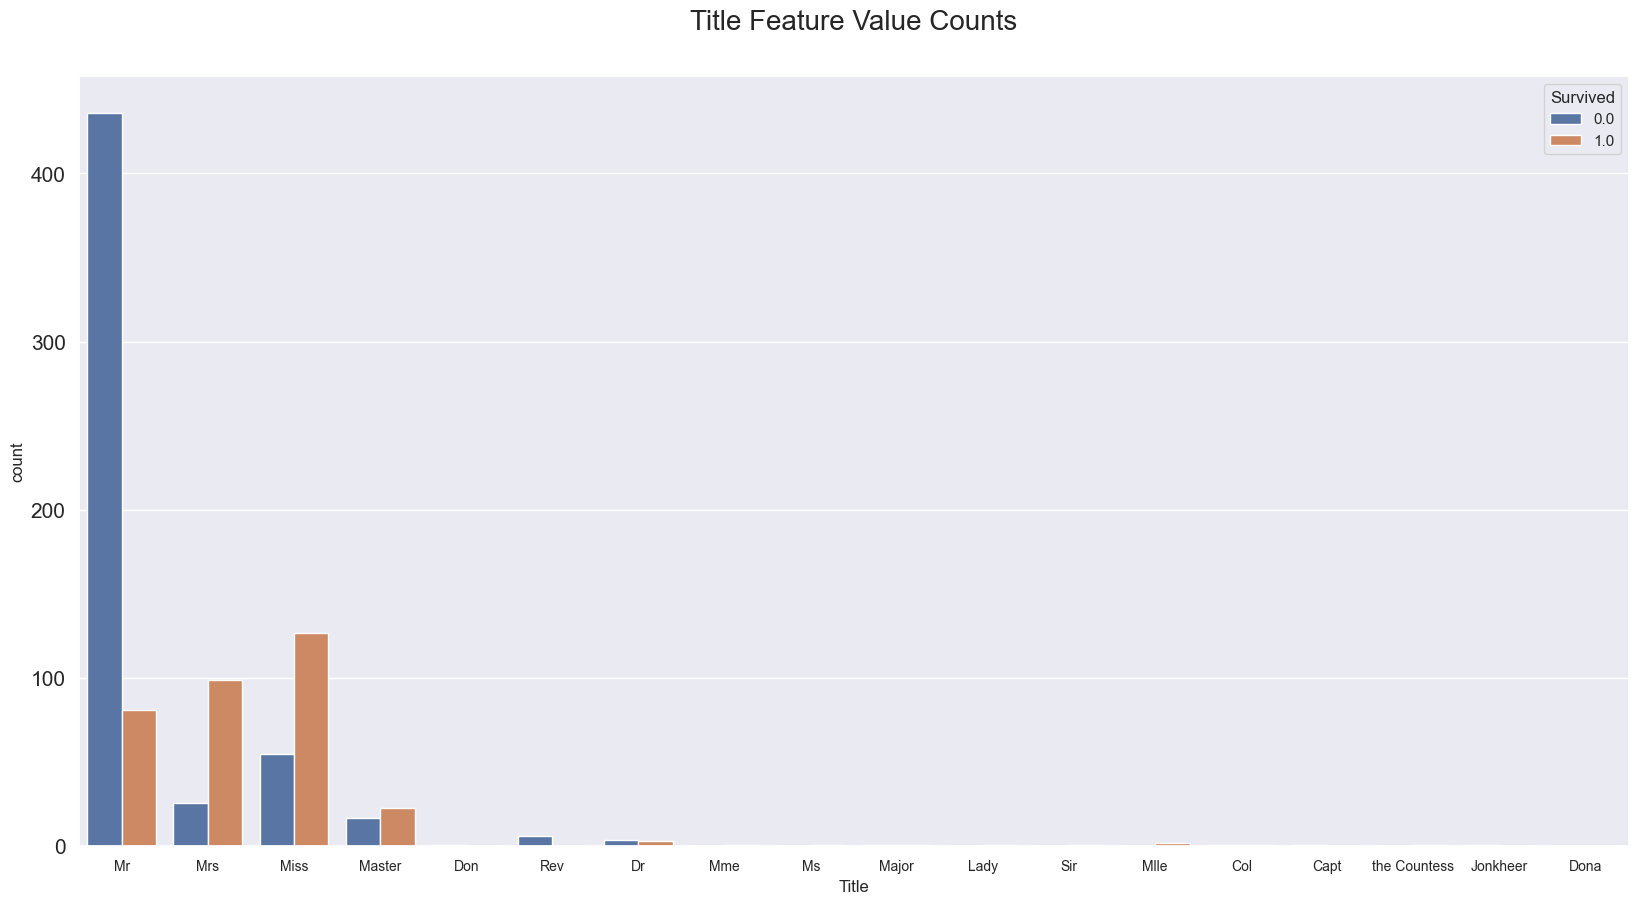

In [11]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=15)
axs.set_title('Title Feature Value Counts', size=20, y=1.05)
sns.countplot(x='Title', hue='Survived', data=df_all)

Females had higher survival rate than males. "Master" had the highest survival rate among males.  "Mrs" had the highest survival rate among females. <br>

Classify the titles as:

* 'Mr' : 'Mr'
* 'Mrs' : 'Mrs', 'Mme', 'Ms' (Because the only 'Ms' survived, I put her into the highest survival rate category.)
* 'Miss' : 'Miss', 'Mlle', 'Lady', 'Mme', 'the Countess'
* 'Upper_class' : 'Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer', 'Dona'

<Axes: title={'center': 'Title Feature Value Counts'}, xlabel='Title', ylabel='count'>

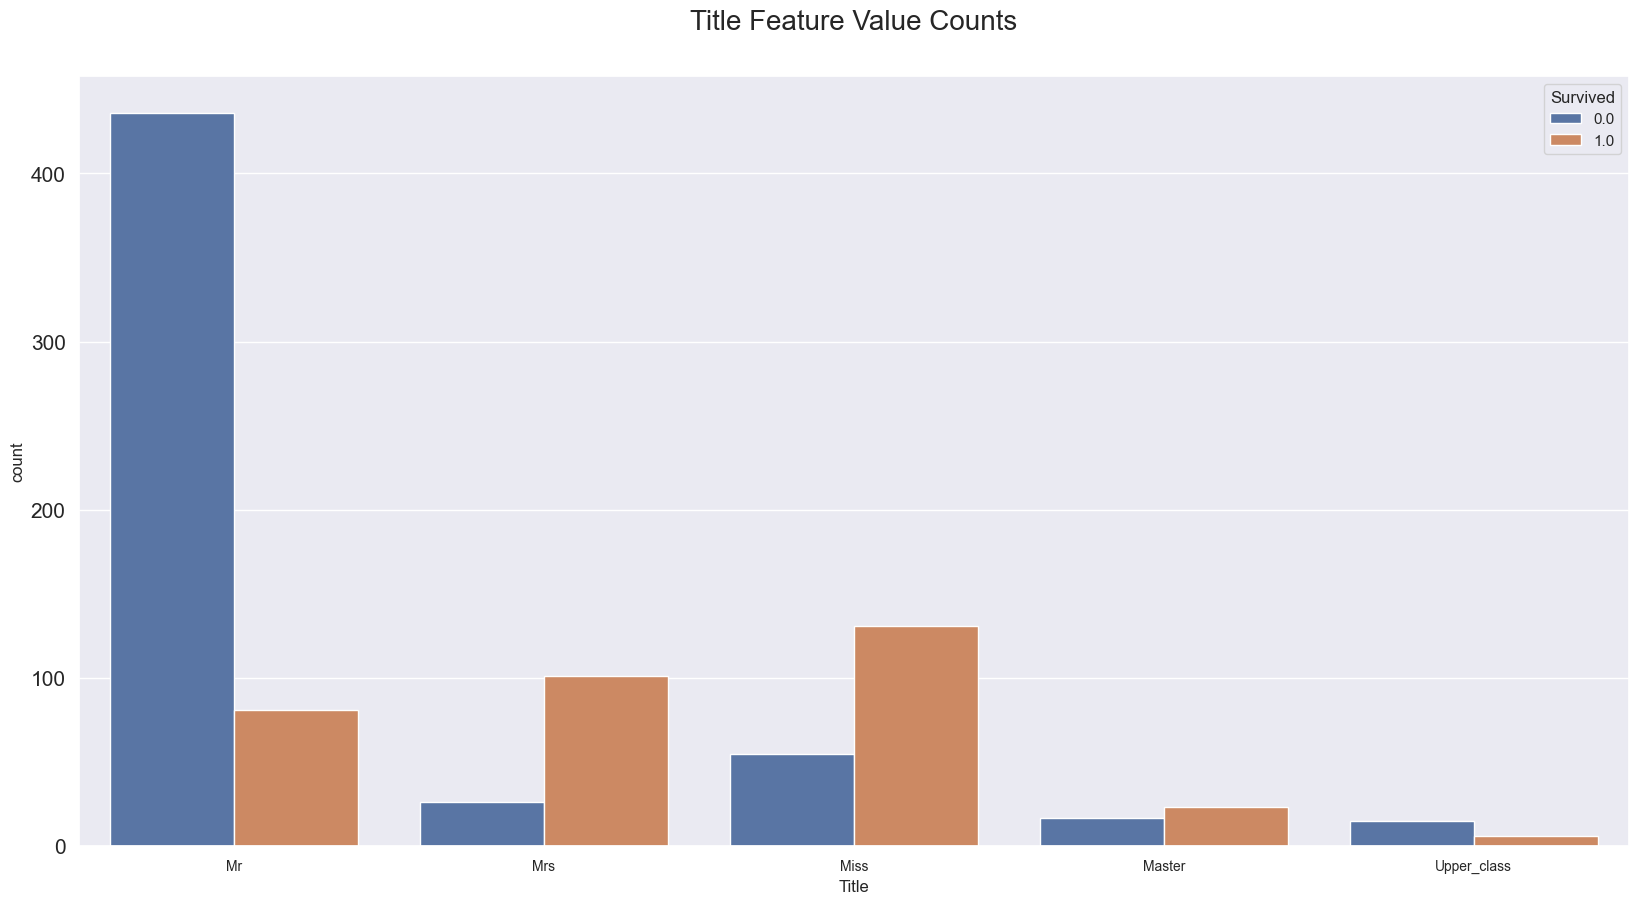

In [12]:
df_all['Title'] = df_all['Title'].replace(['Mrs', 'Mme', 'Ms'], 'Mrs')
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mlle', 'Lady', 'Mme', 'the Countess'], 'Miss')
df_all['Title'] = df_all['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer', 'Dona'], 'Upper_class')

fig, axs = plt.subplots(figsize=(20, 10))
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=15)
axs.set_title('Title Feature Value Counts', size=20, y=1.05)
sns.countplot(x='Title', hue='Survived', data=df_all)

### 'Ticket'

The ticket with the same number may know each others. They may group together during the disaster. Get the new features `'ticket_survival'` and `'ticket_death'` using the same methods as `'family_survival'` and `'family_death'`. <br>

The `'Ticket'` feature contains some characters and numbers. I think the characters may indicate the saler or the selling location of the ticket, which have less implact to the survival rate. So I extract the number information of the tickets.

In [13]:
def extract_ticket_number(ticket):
    devide = list(ticket.split())
    if (len(devide) > 1):
        return devide[-1]
    else:
        return devide[0]

extract_ticket_number("C.A. 17248")

'17248'

In [14]:
df_all['Ticket'] = df_all['Ticket'].apply(extract_ticket_number)

display(df_all[['Name', 'Ticket']].head(10))
print("Ticket nunique:", df_all['Ticket'].nunique())
display(df_all['Ticket'].value_counts().head(10))

,Name,Ticket
0,"Braund, Mr. Owen Harris",21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",17599
2,"Heikkinen, Miss. Laina",3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450
5,"Moran, Mr. James",330877
6,"McCarthy, Mr. Timothy J",17463
7,"Palsson, Master. Gosta Leonard",349909
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742
9,"Nasser, Mrs. Nicholas (Adele Achem)",237736


Ticket nunique: 924


Ticket
2343       11
1601        8
2144        8
17608       7
14879       7
3101295     7
347077      7
347082      7
382652      6
347088      6
Name: count, dtype: int64

In [15]:
df_train, df_test = divide_df(df_all)

# calculate 'Weighted_ticket_survival_rate' and 'Weighted_ticket_death_rate'
df_ticket = df_train.groupby(['Ticket'])['Ticket'] \
                     .count().reset_index(name='ticket_count')
df_ticket['ticket_survived'] = df_train.groupby(['Ticket'])['Survived'] \
                                        .sum() \
                                        .reset_index(name='ticket_count')['ticket_count']
df_ticket = df_ticket.sort_values(['ticket_count'], ascending=False)
n_max = df_ticket.iloc[0]['ticket_count']
df_ticket['Weighted_ticket_survival_rate'] = df_ticket['ticket_survived'] / n_max
df_ticket['Weighted_ticket_death_rate'] = (df_ticket['ticket_count'] - df_ticket['ticket_survived']) / n_max
display(df_ticket.head(10))

# add new features 'Weighted_ticket_survival_rate' and 'Weighted_ticket_death_rate'
## on train_data
Weighted_ticket_survival_rate = []
Weighted_ticket_death_rate = []

for i in range(len(df_train)):
    idx = df_ticket.index[df_ticket['Ticket'] == df_train['Ticket'][i]]
    Weighted_ticket_survival_rate.append(df_ticket.loc[idx, 'Weighted_ticket_survival_rate'].iloc[0])
    Weighted_ticket_death_rate.append(df_ticket.loc[idx, 'Weighted_ticket_death_rate'].iloc[0])

df_train['Ticket_survival'] = Weighted_ticket_survival_rate
df_train['Ticket_death'] = Weighted_ticket_death_rate

display(df_train[['Name', 'Ticket', 'Survived', 'Ticket_survival', 'Ticket_death']] \
        [(df_train['Ticket'] == "1601")])

## on test_data
Weighted_ticket_survival_rate = []
Weighted_ticket_death_rate = []

mean_ticket_survival = np.mean(df_train['Ticket_survival'])
mean_ticket_death = np.mean(df_train['Ticket_death'])
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in df_ticket['Ticket'].values:
        idx = df_ticket.index[df_ticket['Ticket'] == df_test['Ticket'].iloc[i]]
        Weighted_ticket_survival_rate.append(df_ticket.loc[idx, 'Weighted_ticket_survival_rate'].iloc[0])
        Weighted_ticket_death_rate.append(df_ticket.loc[idx, 'Weighted_ticket_death_rate'].iloc[0])
    # When the Ticket does not appear in the train_data, give the mean survival/death rate instead.
    else:
        Weighted_ticket_survival_rate.append(mean_ticket_survival)
        Weighted_ticket_death_rate.append(mean_ticket_death)

df_test['Ticket_survival'] = Weighted_ticket_survival_rate
df_test['Ticket_death'] = Weighted_ticket_death_rate

display(df_test[['Name', 'Ticket', 'Ticket_survival', 'Ticket_death']] \
        [(df_test['Ticket'] == "1601")])

df_all = concat_df(df_train, df_test)

,Ticket,ticket_count,ticket_survived,Weighted_ticket_survival_rate,Weighted_ticket_death_rate
464,347082,7,0.0,0.000000,1.000000
196,2343,7,0.0,0.000000,1.000000
94,1601,7,5.0,0.714286,0.285714
168,2144,6,0.0,0.000000,0.857143
468,347088,6,0.0,0.000000,0.857143
358,3101295,6,0.0,0.000000,0.857143
615,382652,5,0.0,0.000000,0.714286
90,14879,5,0.0,0.000000,0.714286
678,LINE,4,1.0,0.142857,0.428571
35,113760,4,4.0,0.571429,0.000000


,Name,Ticket,Survived,Ticket_survival,Ticket_death
74,"Bing, Mr. Lee",1601,1.0,0.714286,0.285714
169,"Ling, Mr. Lee",1601,0.0,0.714286,0.285714
509,"Lang, Mr. Fang",1601,1.0,0.714286,0.285714
643,"Foo, Mr. Choong",1601,1.0,0.714286,0.285714
692,"Lam, Mr. Ali",1601,1.0,0.714286,0.285714
826,"Lam, Mr. Len",1601,0.0,0.714286,0.285714
838,"Chip, Mr. Chang",1601,1.0,0.714286,0.285714


,Name,Ticket,Ticket_survival,Ticket_death
930,"Hee, Mr. Ling",1601,0.714286,0.285714


### 'Cabin'

Large ammount of the feature `'Cabin'` is missing. So it is impractical to find the passengers with same cabin numbers. I decide to extract the characters in the `'Cabin'` feature. Then treat it as a categorial feature.

In [16]:
def extract_cabin_character(cabin):
    if (isinstance(cabin, float)):
        return 'M'
    else:
        return cabin[0] # Cabin is missed

print(extract_cabin_character("B58 B60"))
print(extract_cabin_character(np.nan))

df_all['Cabin'] = df_all['Cabin'].apply(extract_cabin_character)

B
M


Let's see the bar plot of cabins:

<Axes: title={'center': 'Cabin Feature Value Counts'}, xlabel='Cabin', ylabel='count'>

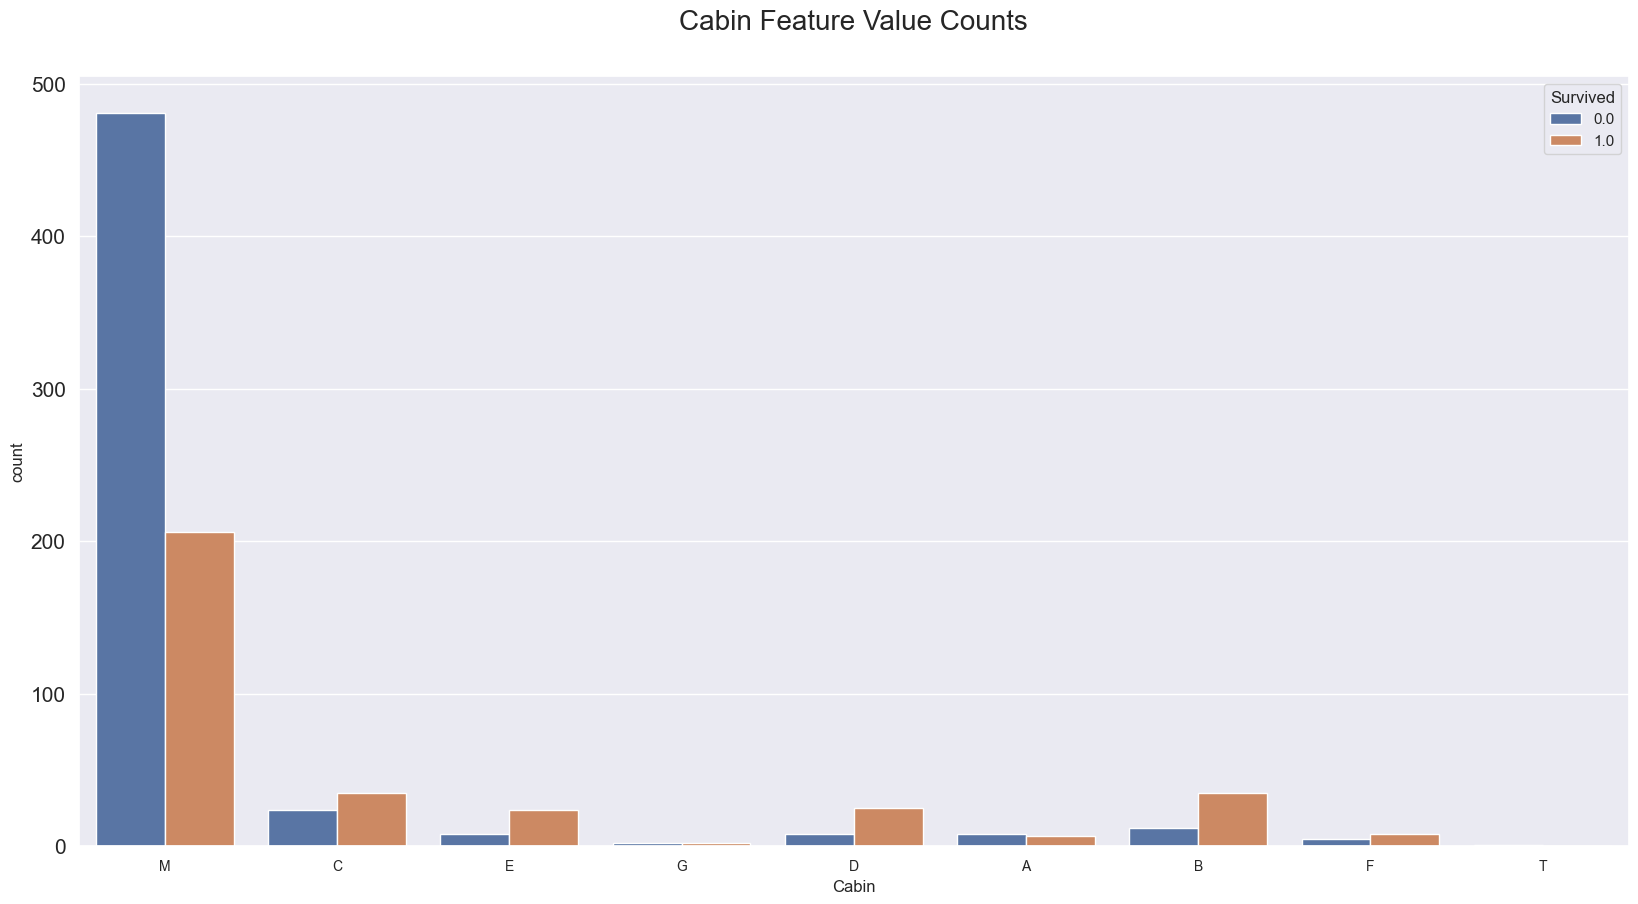

In [17]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=15)
axs.set_title('Cabin Feature Value Counts', size=20, y=1.05)
sns.countplot(x='Cabin', hue='Survived', data=df_all)

Passengers with non-missing 'Cabin' features have higher survival rate than missing ones. This is reasonable because it is harder to retreive the cabin information from dead passengers. <br>

The survival rates for different cabins:

In [18]:
df_train, df_test = divide_df(df_all)
display(df_train.groupby(['Cabin'])['Cabin'].count())
cabin_survived = df_train.groupby(['Cabin', 'Survived'])['Cabin'].count() / df_train.groupby(['Cabin'])['Cabin'].count()
cabin_survived

Cabin
A     15
B     47
C     59
D     33
E     32
F     13
G      4
M    687
T      1
Name: Cabin, dtype: int64

Cabin  Survived
A      0.0         0.533333
       1.0         0.466667
B      0.0         0.255319
       1.0         0.744681
C      0.0         0.406780
       1.0         0.593220
D      0.0         0.242424
       1.0         0.757576
E      0.0         0.250000
       1.0         0.750000
F      0.0         0.384615
       1.0         0.615385
G      0.0         0.500000
       1.0         0.500000
M      0.0         0.700146
       1.0         0.299854
T      0.0         1.000000
Name: Cabin, dtype: float64

According to the survival rate above, group the feature `'Cabin'` as: <br>

* 'MT' : missing cabin features and the only one dead passenger with cabin 'T' with lowest survival rate
* 'ACFG' : medium survival rate
* 'BDE' : highest survival rate

In [19]:
df_all['Cabin'] = df_all['Cabin'].replace(['M', 'T'], 'MT')
df_all['Cabin'] = df_all['Cabin'].replace(['A', 'C', 'F', 'G'], 'ACFG')
df_all['Cabin'] = df_all['Cabin'].replace(['B', 'D', 'E'], 'BDE')

Drop the used features and the redundent feature `'PassengerId'`.Add new feature `'Family_num'` = `'Parch'` + `'SibSp'` + 1.

In [20]:
df_all['Family_num'] = df_all['Parch'] + df_all['SibSp'] + 1
df_all = df_all.drop(columns=['Name', 'Surname', 'Ticket', 'Parch', 'SibSp', 'PassengerId'])

df_all.head(10)

,Age,Cabin,Embarked,Family_death,Family_survival,Fare,Pclass,Sex,Survived,Ticket_death,Ticket_survival,Title,Family_num
0,22.0,MT,S,0.222222,0.000000,7.2500,3,male,0.0,0.142857,0.000000,Mr,2
1,38.0,ACFG,C,0.000000,0.111111,71.2833,1,female,1.0,0.000000,0.142857,Mrs,2
2,26.0,MT,S,0.000000,0.111111,7.9250,3,female,1.0,0.000000,0.142857,Miss,1
3,35.0,ACFG,S,0.111111,0.111111,53.1000,1,female,1.0,0.142857,0.142857,Mrs,2
4,35.0,MT,S,0.111111,0.111111,8.0500,3,male,0.0,0.142857,0.000000,Mr,1
5,NaN,MT,Q,0.222222,0.111111,8.4583,3,male,0.0,0.142857,0.000000,Mr,1
6,54.0,BDE,S,0.111111,0.000000,51.8625,1,male,0.0,0.142857,0.000000,Mr,1
7,2.0,MT,S,0.444444,0.000000,21.0750,3,male,0.0,0.571429,0.000000,Master,5
8,27.0,MT,S,0.333333,0.333333,11.1333,3,female,1.0,0.000000,0.428571,Mrs,3
9,14.0,MT,C,0.111111,0.111111,30.0708,2,female,1.0,0.142857,0.142857,Mrs,2


# Fill the missing values in `'Age'` and `'Embarked'`

### 'Age'

I decide to fill the missing ages with the ages of similar passengers. Digitize the categorial features `'Sex'
` and `'Title'`. Then check the correlation of `'Age'` with other features.

I digitize `'Title'` according to the mean age of each categories to make the correlation more reasonable.

In [21]:
# Encode 'Sex'
label_mapping = {"female": 0, "male": 1}
df_all = df_all.replace({"Sex": label_mapping})

In [22]:
# Encode 'Title'
display(df_all.groupby(['Title'])['Age'].mean().reset_index(name='mean_age').sort_values(['mean_age']))

label_mapping = {"Master": 0, "Miss": 1, "Mr" : 2, "Mrs" : 3, "Upper_class" : 4}
df_all = df_all.replace({"Title": label_mapping})

,Title,mean_age
0,Master,5.482642
1,Miss,21.970047
2,Mr,32.252151
3,Mrs,36.866279
4,Upper_class,45.538462


In [23]:
df_all.corr(numeric_only=True)['Age'][:].abs().sort_values(ascending=False)

Age                1.000000
Title              0.513135
Pclass             0.408106
Family_num         0.240229
Ticket_death       0.191274
Fare               0.178740
Family_death       0.175297
Survived           0.077221
Sex                0.063645
Family_survival    0.057539
Ticket_survival    0.048637
Name: Age, dtype: float64

Two features `'Title'` and `'Pclass'` have high correlation with `'Age'`. Fill the missing value of `'Age'` with the median of the age in the same group classified by `'Title'` and `'Pclass'`.

In [24]:
age_by_pclass_title = df_all.groupby(['Pclass', 'Title']).median(numeric_only=True)['Age']
age_by_pclass_title = age_by_pclass_title.reset_index()
display(age_by_pclass_title)
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

df_all['Age'] = df_all.groupby(['Pclass', 'Title'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

,Pclass,Title,Age
0,1,0,6.0
1,1,1,30.0
2,1,2,41.5
3,1,3,45.0
4,1,4,49.0
5,2,0,2.0
6,2,1,20.0
7,2,2,30.0
8,2,3,30.0
9,2,4,41.5


Median age of all passengers: 28.0


### 'Embarked'

Two passengers with missing `'Embarked'` feature.

In [25]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Family_death,Family_survival,Fare,Pclass,Sex,Survived,Ticket_death,Ticket_survival,Title,Family_num
61,38.0,BDE,NaN,0.0,0.111111,80.0,1,0,1.0,0.0,0.285714,1,1
829,62.0,BDE,NaN,0.0,0.111111,80.0,1,0,1.0,0.0,0.285714,3,1


Both of them have no family, `'Fare'` = 80 and `'Pclass'` = 1. No other passenger has the same fare. Plot the count bar of Pclass and Embarked:

<Axes: title={'center': 'Embarked Feature Value Counts'}, xlabel='Embarked', ylabel='count'>

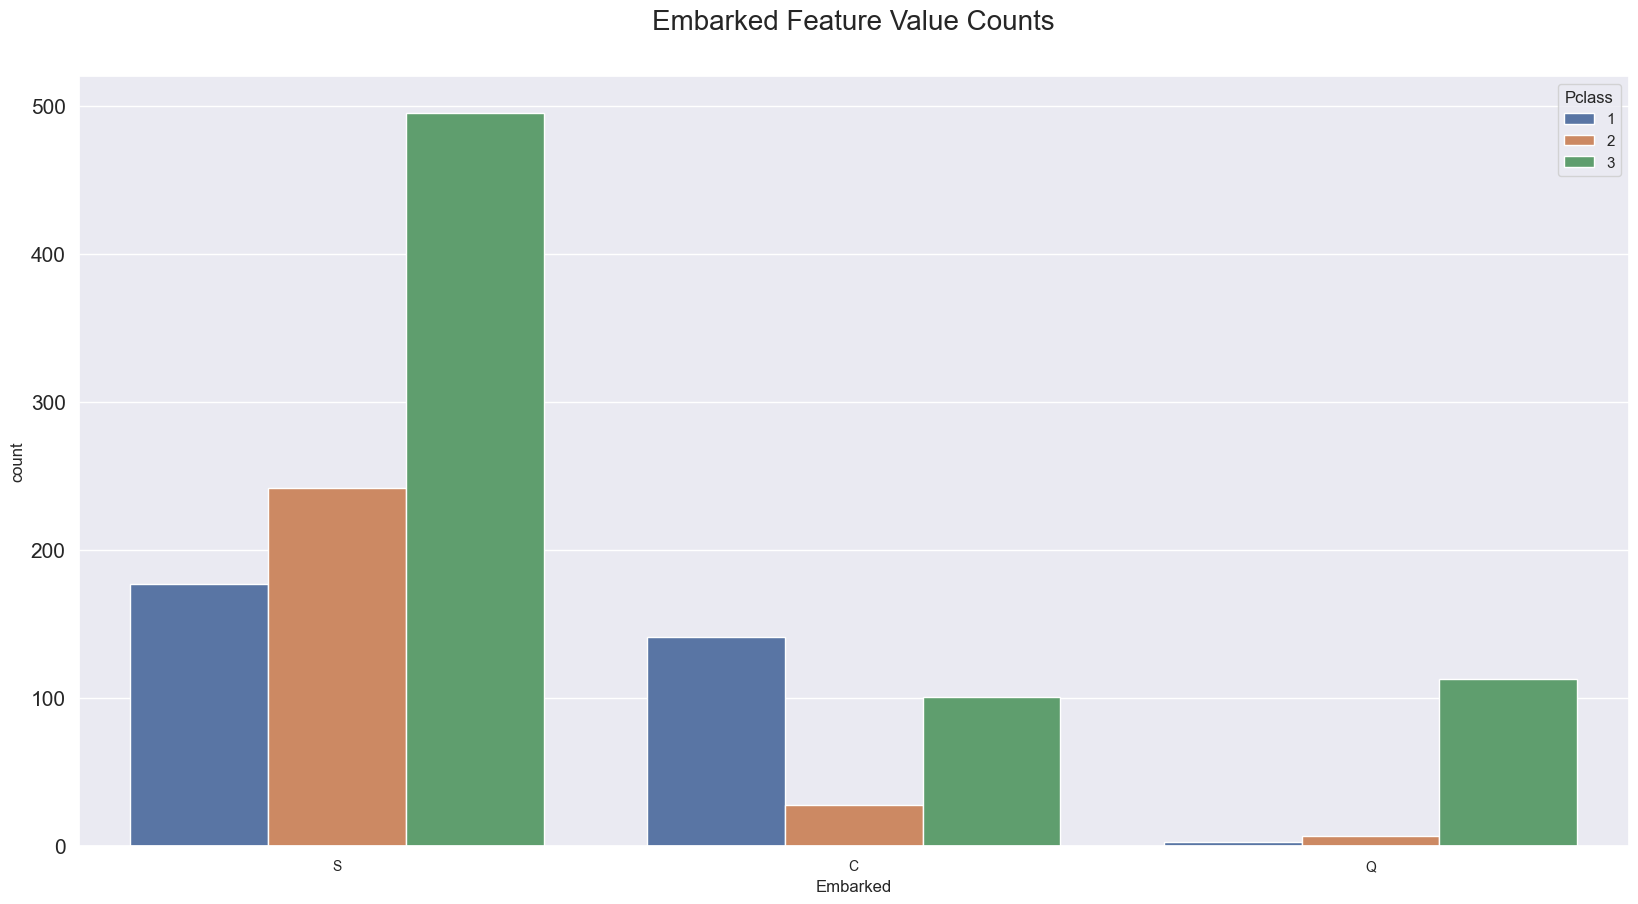

In [26]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=15)
axs.set_title('Embarked Feature Value Counts', size=20, y=1.05)
sns.countplot(x='Embarked', hue='Pclass', data=df_all)

The probability to embark on `'S'` is the largest for `'Pclass'` = 1. Assign the missing `'Embarked'` as 'S'. 

In [27]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1309 non-null   float64
 1   Cabin            1309 non-null   object 
 2   Embarked         1309 non-null   object 
 3   Family_death     1309 non-null   float64
 4   Family_survival  1309 non-null   float64
 5   Fare             1308 non-null   float64
 6   Pclass           1309 non-null   int64  
 7   Sex              1309 non-null   int64  
 8   Survived         891 non-null    float64
 9   Ticket_death     1309 non-null   float64
 10  Ticket_survival  1309 non-null   float64
 11  Title            1309 non-null   int64  
 12  Family_num       1309 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 133.1+ KB


# Data binning and encoding

Binning the continuous features `'Age'` and `'Fare'`

In [29]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 8)
df_all['Age'] = pd.qcut(df_all['Age'], 8)

Categorize `'Family_num'`

In [30]:
df_all['Family_scale'] = pd.cut(df_all['Family_num'], [0, 1, 4, 6, 11])
df_all = df_all.drop(columns = ['Family_num'])

Label Encoding Non-Numerical Features: `'Age'`, `'Cabin'`, `'Embarked'`, `'Fare'`, `'Family_scale'`

In [31]:
from sklearn import preprocessing
>>> label_encoder = preprocessing.LabelEncoder()

# survival rate from low to high
label_mapping = {"MT": 0, "ACFG": 1, "BDE": 2}
df_all = df_all.replace({"Cabin": label_mapping})

non_numeric_features = ['Age', 'Embarked', 'Fare', 'Family_scale']

for feature in non_numeric_features:        
    df_all[feature] = label_encoder.fit_transform(df_all[feature])

There are high correlations between `'Family_survival'` and `'Ticket_survival'`, also between `'Family_death'` and `'Ticket_death'`. Because family members have high chances to buy ticket together. To avoid multicollinearity, I averaged these features.

In [32]:
df_all[['Family_survival', 'Family_death', 'Ticket_survival', 'Ticket_death']].corr()

df_all['Survival_rate'] = (df_all['Family_survival'] + df_all['Ticket_survival']) / 2
df_all['Death_rate'] = (df_all['Family_death'] + df_all['Ticket_death']) / 2
df_all.drop(columns=['Family_survival', 'Family_death', 'Ticket_survival', 'Ticket_death'], inplace=True)

In [33]:
df_all.head(10)

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title,Family_scale,Survival_rate,Death_rate
0,2,0,2,0,3,1,0.0,2,1,0.000000,0.182540
1,6,1,0,7,1,0,1.0,3,1,0.126984,0.000000
2,3,0,2,2,3,0,1.0,1,0,0.126984,0.000000
3,5,1,2,6,1,0,1.0,3,1,0.126984,0.126984
4,5,0,2,2,3,1,0.0,2,0,0.055556,0.126984
5,3,0,1,2,3,1,0.0,2,0,0.055556,0.182540
6,7,2,2,6,1,1,0.0,2,0,0.000000,0.126984
7,0,0,2,4,3,1,0.0,0,2,0.000000,0.507937
8,4,0,2,3,3,0,1.0,3,1,0.380952,0.166667
9,0,0,0,5,2,0,1.0,3,1,0.126984,0.126984


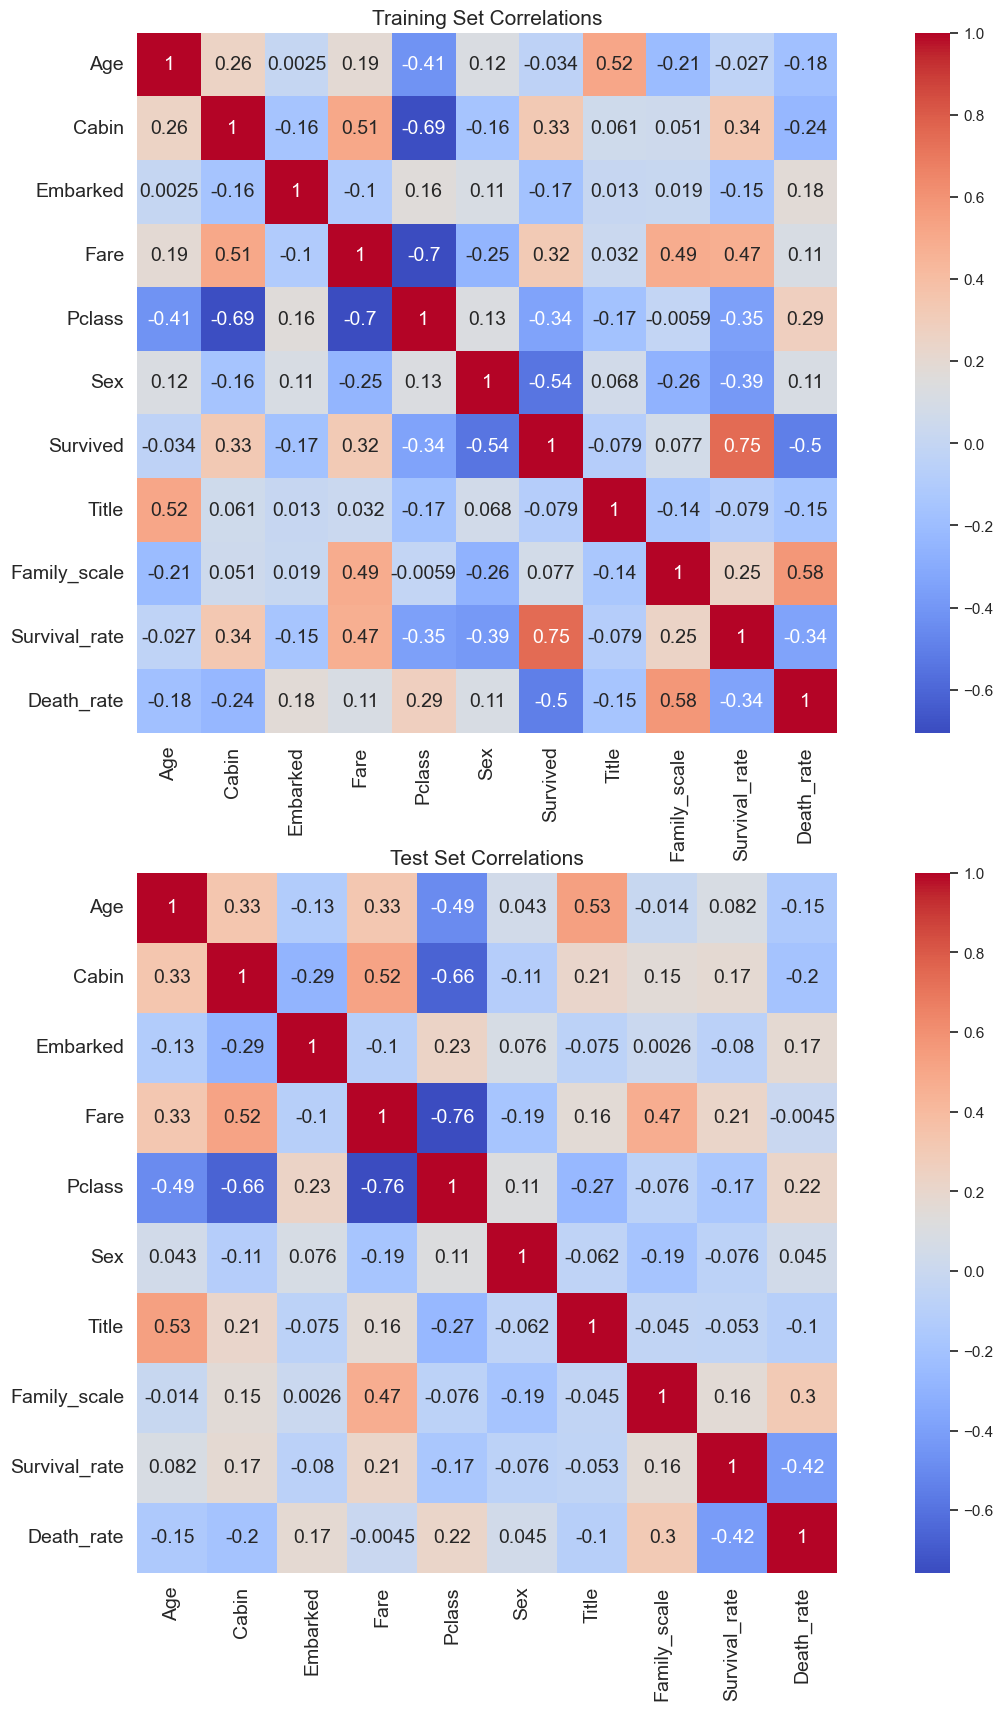

In [34]:
df_train, df_test = divide_df(df_all)

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.corr(numeric_only=True), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.corr(numeric_only=True), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

One-Hot Encoding the Categorical Features: 

In [35]:
categorial_features = ['Cabin', 'Embarked', 'Pclass', 'Sex', 'Title', 'Family_scale']

for feature in categorial_features:
    df_all = pd.concat([df_all, pd.get_dummies(df_all[feature], prefix=feature)], axis=1)

In [36]:
print(df_all.drop(columns=categorial_features).columns)
df_all.head(10)

Index(['Age', 'Fare', 'Survived', 'Survival_rate', 'Death_rate', 'Cabin_0',
       'Cabin_1', 'Cabin_2', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Family_scale_0',
       'Family_scale_1', 'Family_scale_2', 'Family_scale_3'],
      dtype='object')


,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title,Family_scale,Survival_rate,...,Sex_1,Title_0,Title_1,Title_2,Title_3,Title_4,Family_scale_0,Family_scale_1,Family_scale_2,Family_scale_3
0,2,0,2,0,3,1,0.0,2,1,0.000000,...,True,False,False,True,False,False,False,True,False,False
1,6,1,0,7,1,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False
2,3,0,2,2,3,0,1.0,1,0,0.126984,...,False,False,True,False,False,False,True,False,False,False
3,5,1,2,6,1,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False
4,5,0,2,2,3,1,0.0,2,0,0.055556,...,True,False,False,True,False,False,True,False,False,False
5,3,0,1,2,3,1,0.0,2,0,0.055556,...,True,False,False,True,False,False,True,False,False,False
6,7,2,2,6,1,1,0.0,2,0,0.000000,...,True,False,False,True,False,False,True,False,False,False
7,0,0,2,4,3,1,0.0,0,2,0.000000,...,True,True,False,False,False,False,False,False,True,False
8,4,0,2,3,3,0,1.0,3,1,0.380952,...,False,False,False,False,True,False,False,True,False,False
9,0,0,0,5,2,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False


# Model building with machine learning 

Since I don't have the true table of the test data. I decide to divide the "original" train data set into training and testing set for the model building.

In [37]:
df_train, df_test = divide_df(df_all)
print(df_train.shape)
df_train.head(10)

(891, 31)


,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title,Family_scale,Survival_rate,...,Sex_1,Title_0,Title_1,Title_2,Title_3,Title_4,Family_scale_0,Family_scale_1,Family_scale_2,Family_scale_3
0,2,0,2,0,3,1,0.0,2,1,0.000000,...,True,False,False,True,False,False,False,True,False,False
1,6,1,0,7,1,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False
2,3,0,2,2,3,0,1.0,1,0,0.126984,...,False,False,True,False,False,False,True,False,False,False
3,5,1,2,6,1,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False
4,5,0,2,2,3,1,0.0,2,0,0.055556,...,True,False,False,True,False,False,True,False,False,False
5,3,0,1,2,3,1,0.0,2,0,0.055556,...,True,False,False,True,False,False,True,False,False,False
6,7,2,2,6,1,1,0.0,2,0,0.000000,...,True,False,False,True,False,False,True,False,False,False
7,0,0,2,4,3,1,0.0,0,2,0.000000,...,True,True,False,False,False,False,False,False,True,False
8,4,0,2,3,3,0,1.0,3,1,0.380952,...,False,False,False,False,True,False,False,True,False,False
9,0,0,0,5,2,0,1.0,3,1,0.126984,...,False,False,False,False,True,False,False,True,False,False


Transform the processed datas into numpy arrays.

In [38]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [39]:
X = preprocessing.StandardScaler().fit_transform(df_train.drop(columns=['Survived']))
y = df_train['Survived'].to_numpy()

print(X.shape)
print(y.shape)

(891, 30)
(891,)


In [40]:
seed = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
#      kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

LR: 0.972734 (0.020390)
LDA: 0.963159 (0.020246)
KNN: 0.897389 (0.047408)
CART: 0.990348 (0.010684)
NB: 0.837916 (0.042133)
SVM: 0.976037 (0.020410)


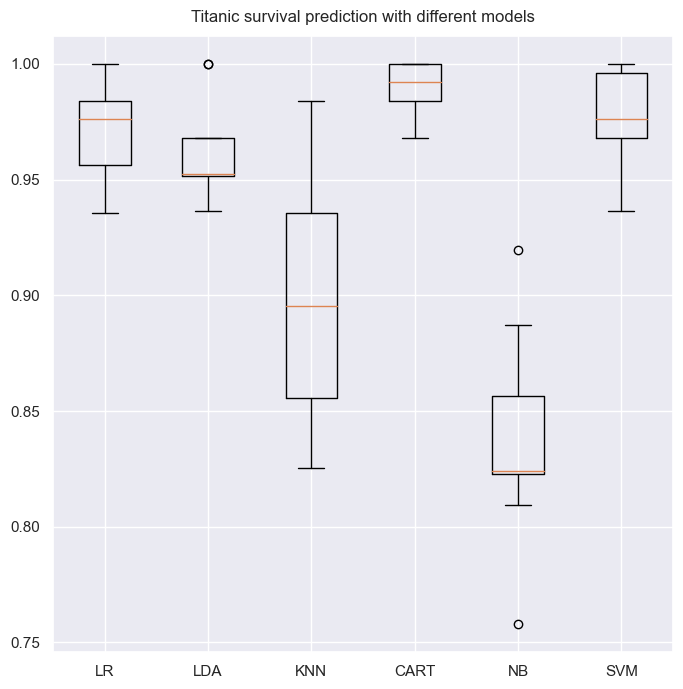

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title('Titanic survival prediction with different models', pad=10)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()